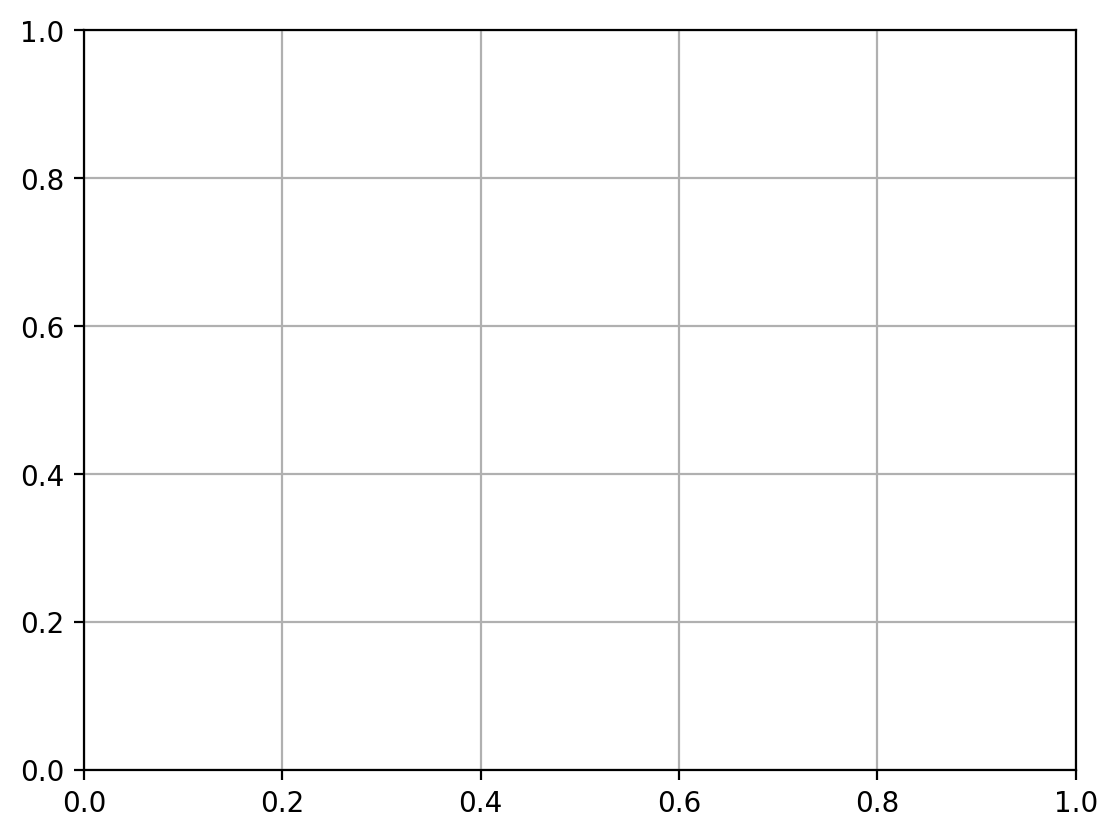

In [2]:
"""Imports"""
from calendar import month
from ctypes import c_ulong
import pandas as pd
import numpy as np
import re
import chainladder as cl
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import ipywidgets as widgets
from dateutil import relativedelta as rd
import datetime
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import sqlite3
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-deep')
plt.grid(None)
%config InlineBackend.figure_format = 'retina'
from sklearn.metrics import r2_score



In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
# Ruta de la base
df = pd.read_excel('TestDB.xlsx')
df


,id,creation_date,origin_year,dev_periods,claim_amount,year_start,year_end,cumulative,company_id,type,Segment,GrossNet
0,1,2024-05-29 20:56:08.504624,2023-01-01,2023-01-01,1000.000000,2023-01-01,2022-08-31,1.0,Triangle Corp,paid,Motor,Gross
1,2,2024-05-29 20:59:56.404288,2023-01-01,2023-01-01,1000.000000,2023-01-01,2022-08-31,1.0,Triangle Corp,paid,Motor,Gross
2,3,2024-05-29 21:00:00.203807,2023-01-01,2023-01-01,1000.000000,2023-01-01,2022-08-31,1.0,Triangle Corp,paid,Motor,Gross
3,4,2024-05-29 21:00:13.027204,2023-01-01,2023-01-01,1000.000000,2023-01-01,2022-08-31,0.0,Triangle Corp,paid,Motor,Gross
4,5,2024-05-31 14:40:39.942992,2014-01-01,2014-01-01,566007.000000,2014-01-01,2014-12-31,0.0,Triangle Corp,paid,Motor,Gross
...,...,...,...,...,...,...,...,...,...,...,...,...
2227,1793,2024-06-01 17:59:42.017194,2021-01-01,2022-01-01,36633.385714,2021-01-01,2021-12-31,0.0,Triangle Corp,Exposure,Homeowners,Net
2228,1793,2024-06-01 17:59:42.017862,2021-01-01,2023-01-01,42022.714286,2021-01-01,2021-12-31,0.0,Triangle Corp,Exposure,Homeowners,Net
2229,1793,2024-06-01 17:59:42.018521,2022-01-01,2022-01-01,42928.500000,2022-01-01,2022-12-31,0.0,Triangle Corp,Exposure,Homeowners,Net
2230,1793,2024-06-01 17:59:42.019060,2022-01-01,2023-01-01,7242.128571,2022-01-01,2022-12-31,0.0,Triangle Corp,Exposure,Homeowners,Net


In [5]:
#Inputs in FrontEnd
InputOrigin='origin_year'
InputDevelopment='dev_periods'
InputColumns='claim_amount'
InputCumulative=True
InputType="type"
InputSegment="Segment"
InputGrossNet="GrossNet"

we = cl.Triangle(
    df,
    origin=InputOrigin,
    development=InputDevelopment,
    columns=InputColumns,
    index=[InputType,InputSegment,InputGrossNet],
    cumulative=InputCumulative
)
we
we.to_csv('TestDatatoAirus.csv')

In [6]:
"""separating the triangles - Input that will depend on the triangle we'd like to create"""
Type='paid'
Segment='Motor'
GrossNet='Gross'

"""generic"""
triangle= we.loc[Type, Segment, GrossNet]
#incurred = we.loc[Type, Segment, GrossNet]

"""paid and incurred"""
triangle_paid=we.loc['paid', Segment, GrossNet]
triangle_incurred=we.loc['incurred', Segment,GrossNet]

# Calculating caseReserve triangle - if we have incurred data
caseReserve = triangle_incurred - triangle_paid

# Calculating incurred triangle - if we have case reserve data data
#incurred = caseReserve+ paid

"""claim counts"""
triangle_reported=we.loc['Reported CC', Segment, GrossNet]
triangle_closed=we.loc['Closed CC', Segment,GrossNet]

# Calculating open triangle - if we have reported and closed
triangle_open = triangle_reported - triangle_closed

# Calculating closed triangle - if we have reported and open
#triangle_closed = triangle_reported - triangle_open

# Calculating closed triangle - if we have closed and open
#triangle_reported = triangle_closed + triangle_open

"""severity"""
triangle_severity_reported=triangle_incurred/triangle_reported
triangle_severity_paid=triangle_paid/triangle_closed

# Saving triangles in a dictionary
#TriangleData = {}
#triangles = {'paid': paid, 'incurred': incurred, 'caseReserve': caseReserve}

#triangle.to_csv('Test2.csv')
triangle


,12,24,36,48,60,72,84,96,108,120
2014,"791,013","1,218,170","1,308,134","1,323,137","1,323,137","1,323,137","1,324,080","1,324,080","1,324,080","1,324,080"
2015,"494,182","650,063","756,963","778,837","765,148","764,953","764,953","764,953","764,953",
2016,"442,757","991,545","1,072,711","1,048,916","1,143,483","1,153,061","1,170,170","1,178,998",,
2017,"597,875","1,034,782","1,277,927","1,464,406","1,550,619","1,592,918","1,592,918",,,
2018,"208,827","435,282","602,923","832,801","952,941","944,615",,,,
2019,"1,150,658","1,775,563","1,861,813","1,991,420","2,003,330",,,,,
2020,"781,186","1,308,662","1,565,432","1,792,740",,,,,,
2021,"793,946","1,364,051","1,506,834",,,,,,,
2022,"302,908","616,447",,,,,,,,
2023,"189,521",,,,,,,,,


<Axes: title={'center': 'Triangle Cumulative'}>

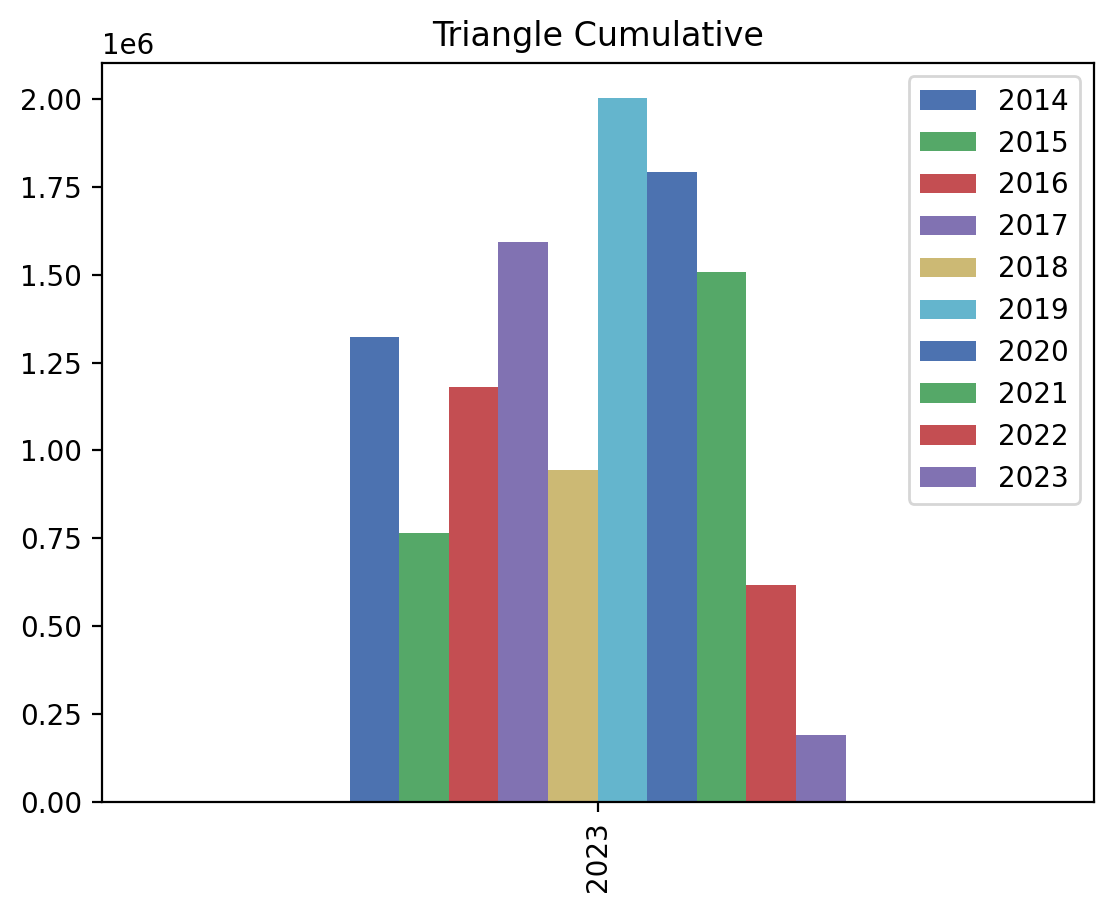

In [7]:
"""Triangle Plot"""""
triangle.latest_diagonal.T.plot(kind='bar',
title="Triangle Cumulative")

In [8]:
"""Dev to Calendar-Generic"""
triangle.dev_to_val()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2014,"791,013","1,218,170","1,308,134","1,323,137","1,323,137","1,323,137","1,324,080","1,324,080","1,324,080","1,324,080"
2015,,"494,182","650,063","756,963","778,837","765,148","764,953","764,953","764,953","764,953"
2016,,,"442,757","991,545","1,072,711","1,048,916","1,143,483","1,153,061","1,170,170","1,178,998"
2017,,,,"597,875","1,034,782","1,277,927","1,464,406","1,550,619","1,592,918","1,592,918"
2018,,,,,"208,827","435,282","602,923","832,801","952,941","944,615"
2019,,,,,,"1,150,658","1,775,563","1,861,813","1,991,420","2,003,330"
2020,,,,,,,"781,186","1,308,662","1,565,432","1,792,740"
2021,,,,,,,,"793,946","1,364,051","1,506,834"
2022,,,,,,,,,"302,908","616,447"
2023,,,,,,,,,,"189,521"


In [9]:
"""Cum to Incr Generic"""
triangle.cum_to_incr()

,12,24,36,48,60,72,84,96,108,120
2014,"791,013","427,157","89,964","15,003",,,943,,,
2015,"494,182","155,881","106,900","21,874","-13,689",-195,,,,
2016,"442,757","548,788","81,166","-23,795","94,567","9,578","17,109","8,828",,
2017,"597,875","436,907","243,145","186,479","86,213","42,299",,,,
2018,"208,827","226,455","167,641","229,878","120,140","-8,326",,,,
2019,"1,150,658","624,905","86,250","129,607","11,910",,,,,
2020,"781,186","527,476","256,770","227,308",,,,,,
2021,"793,946","570,105","142,783",,,,,,,
2022,"302,908","313,539",,,,,,,,
2023,"189,521",,,,,,,,,


In [10]:
"""Incr to Cum - Generic"""
triangle.incr_to_cum()

,12,24,36,48,60,72,84,96,108,120
2014,"791,013","1,218,170","1,308,134","1,323,137","1,323,137","1,323,137","1,324,080","1,324,080","1,324,080","1,324,080"
2015,"494,182","650,063","756,963","778,837","765,148","764,953","764,953","764,953","764,953",
2016,"442,757","991,545","1,072,711","1,048,916","1,143,483","1,153,061","1,170,170","1,178,998",,
2017,"597,875","1,034,782","1,277,927","1,464,406","1,550,619","1,592,918","1,592,918",,,
2018,"208,827","435,282","602,923","832,801","952,941","944,615",,,,
2019,"1,150,658","1,775,563","1,861,813","1,991,420","2,003,330",,,,,
2020,"781,186","1,308,662","1,565,432","1,792,740",,,,,,
2021,"793,946","1,364,051","1,506,834",,,,,,,
2022,"302,908","616,447",,,,,,,,
2023,"189,521",,,,,,,,,


In [11]:
"""Link-Ratios - Generic"""
triangle_factors = triangle.link_ratio
triangle_factors

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
2014,1.5400,1.0739,1.0115,1.0000,1.0000,1.0007,1.0000,1.0000,1.0000
2015,1.3154,1.1644,1.0289,0.9824,0.9997,1.0000,1.0000,1.0000,
2016,2.2395,1.0819,0.9778,1.0902,1.0084,1.0148,1.0075,,
2017,1.7308,1.2350,1.1459,1.0589,1.0273,1.0000,,,
2018,2.0844,1.3851,1.3813,1.1443,0.9913,,,,
2019,1.5431,1.0486,1.0696,1.0060,,,,,
2020,1.6752,1.1962,1.1452,,,,,,
2021,1.7181,1.1047,,,,,,,
2022,2.0351,,,,,,,,


In [12]:
"""Link-Ratios Heat Map - Generic"""

triangle_factors.heatmap(cmap='Spectral', low=0.1, high=0.5)

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
2014,1.5400,1.0739,1.0115,1.0000,1.0000,1.0007,1.0000,1.0000,1.0000
2015,1.3154,1.1644,1.0289,0.9824,0.9997,1.0000,1.0000,1.0000,
2016,2.2395,1.0819,0.9778,1.0902,1.0084,1.0148,1.0075,,
2017,1.7308,1.2350,1.1459,1.0589,1.0273,1.0000,,,
2018,2.0844,1.3851,1.3813,1.1443,0.9913,,,,
2019,1.5431,1.0486,1.0696,1.0060,,,,,
2020,1.6752,1.1962,1.1452,,,,,,
2021,1.7181,1.1047,,,,,,,
2022,2.0351,,,,,,,,


In [23]:
"""Averages - Generic"""
#Input for each average we want to show. We should add somehow the option to drop a valuation year from all the averages. See if we can drop last periods

InputMethod = 'volume'
InputPeriods= 100
InputDropHighandLow=False

triangle
Average1=cl.Development(average=InputMethod, n_periods=InputPeriods, drop_high=InputDropHighandLow, drop_low=InputDropHighandLow)
transformed_triangle = Average1.fit_transform(triangle)
ldfAverage1=transformed_triangle.ldf_

"""Different Averages for Graph"""
VolumeAll=cl.Development(average='volume',n_periods=100)
transformed_triangleVolumeAll = VolumeAll.fit_transform(triangle)
ldfVolumeAll=transformed_triangleVolumeAll.ldf_

Volume5=cl.Development(average='volume',n_periods=5)
transformed_triangleVolume5 = Volume5.fit_transform(triangle)
ldfVolume5=transformed_triangleVolume5.ldf_

SimpleAll=cl.Development(average='simple',n_periods=100)
transformed_triangleSimpleAll= SimpleAll.fit_transform(triangle)
ldfldfSimpleAll=transformed_triangleSimpleAll.ldf_

Simple5=cl.Development(average='simple',n_periods=5)
transformed_triangleSimple5 = Volume5.fit_transform(triangle)
ldfSimple5=transformed_triangleSimple5.ldf_

#Inputs for mannual selection. See a way to automate the lenght of the vector
Input12=1
Input24=1
Input36=1
Input48=1
Input60=1
Input72=1
Input84=1
Input96=1
Input108=1
Input120=1

MannualPatterns={12:Input12, 24: Input24, 36:Input36, 48:Input48, 60:Input60, 72:Input72, 84:Input84, 96:Input96, 108:Input108, 120:Input120}
MannualAverage=cl.DevelopmentConstant(patterns=MannualPatterns,style='ldf').fit(triangle).ldf_
MannualAverage

#till working on how to select between different averages. This one should be de selection with the combination the actuary wants to select
InitialSelected_LDF=Average1
Transformed_triangleInitialSelected = InitialSelected_LDF.fit_transform(triangle)
ldfInitialSelected=Transformed_triangleInitialSelected.ldf_
cdfInitialSelected=Transformed_triangleInitialSelected.cdf_

"""Methos for each traingle"""
triangle_paid
Average1_paid=cl.Development(average=InputMethod, n_periods=InputPeriods, drop_high=InputDropHighandLow, drop_low=InputDropHighandLow)
transformed_trianglepaid = Average1_paid.fit_transform(triangle_paid)
ldfAverage1_paid=transformed_trianglepaid.ldf_

triangle_incurred
Average1_incurred=cl.Development(average=InputMethod, n_periods=InputPeriods, drop_high=InputDropHighandLow, drop_low=InputDropHighandLow)
transformed_triangleincurred = Average1_incurred.fit_transform(triangle_incurred)
ldfAverage1_incurred=transformed_triangleincurred.ldf_

triangle_reported
Average1_reported=cl.Development(average=InputMethod, n_periods=InputPeriods, drop_high=InputDropHighandLow, drop_low=InputDropHighandLow)
transformed_trianglereported = Average1_reported.fit_transform(triangle_reported)
ldfAverage1_reported=transformed_trianglereported.ldf_

triangle_closed
Average1_closed=cl.Development(average=InputMethod, n_periods=InputPeriods, drop_high=InputDropHighandLow, drop_low=InputDropHighandLow)
transformed_triangleclosed = Average1_closed.fit_transform(triangle_closed)
ldfAverage1_closed=transformed_triangleclosed.ldf_

triangle_severity_reported
Average1_severityreported=cl.Development(average=InputMethod, n_periods=InputPeriods, drop_high=InputDropHighandLow, drop_low=InputDropHighandLow)
transformed_triangleseverityreported = Average1_severityreported.fit_transform(triangle_severity_reported)
ldfAverage1_reported=transformed_triangleseverityreported.ldf_

triangle_severity_paid
Average1_severitypaid=cl.Development(average=InputMethod, n_periods=InputPeriods, drop_high=InputDropHighandLow, drop_low=InputDropHighandLow)
transformed_triangleseveritypaid = Average1_severitypaid.fit_transform(triangle_severity_paid)
ldfAverage1_closed=transformed_triangleseveritypaid.ldf_


"""LDF Plots - Generic"""

triangle.T.plot(marker="",
title="LDF Graph by DP")

triangle.plot(marker="",
title="LDF Graph by CY")

"""Culative Patterns Plot"""
plotPatterns=pd.concat([(1/transformed_triangleVolumeAll.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume All'}),(1/transformed_triangleVolume5.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 5'}),(1/transformed_triangleSimpleAll.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple All'}), (1/transformed_triangleSimple5.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 5'}),(1/Transformed_triangleInitialSelected.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Initial Selected'})]).T.plot(marker="",title="Cumulative Patterns")

"""Incremental Patterns Plot"""
plotPatterns=pd.concat([(1/transformed_triangleVolumeAll.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume All'}),(1/transformed_triangleVolume5.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Volume 5'}),(1/transformed_triangleSimpleAll.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple All'}), (1/transformed_triangleSimple5.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 5'}),(1/transformed_triangleSimple5.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Simple 5'}),(1/Transformed_triangleInitialSelected.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Initial Selected'})]).T.plot(marker="",title="Incremental Patterns")





In [24]:
"""Tail Curve - Generic""" #Still need to figure out why projection_period argument is not working for the exponential and inverse power fit

InputFuturePeriods=10

exponentialtailcurve = cl.TailCurve(curve='exponential',extrap_periods=InputFuturePeriods, attachment_age=12).fit(triangle)
exponentialtailcurve_ldf=exponentialtailcurve.ldf_

inversepowertailcurve = cl.TailCurve(curve='inverse_power',extrap_periods=InputFuturePeriods, attachment_age=12).fit(triangle)
inversepowertailcurve_ldf=inversepowertailcurve.ldf_

#Input for selected tail curve
SelectedCurve='exponential'

SelectedTailCurve=cl.TailCurve(curve=SelectedCurve,extrap_periods=InputFuturePeriods)

"""Tail Curve for each Type"""
SelectedTailCurvePaid=cl.TailCurve(curve=SelectedCurve, extrap_periods=InputFuturePeriods).fit(triangle_incurred)
SelectedTailCurveIncurred=cl.TailCurve(curve=SelectedCurve,extrap_periods=InputFuturePeriods).fit(triangle_paid)
SelectedTailCurvereported=cl.TailCurve(curve=SelectedCurve,extrap_periods=InputFuturePeriods).fit(triangle_reported)
SelectedTailCurveclosed=cl.TailCurve(curve=SelectedCurve,extrap_periods=InputFuturePeriods).fit(triangle_closed)

inversepowertailcurve_ldf
exponentialtailcurve_ldf


,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132,132-144
(All),1.5149,1.2014,1.0788,1.0308,1.0121,1.0047,1.0018,1.0007,1.0003,1.0001,1.0001


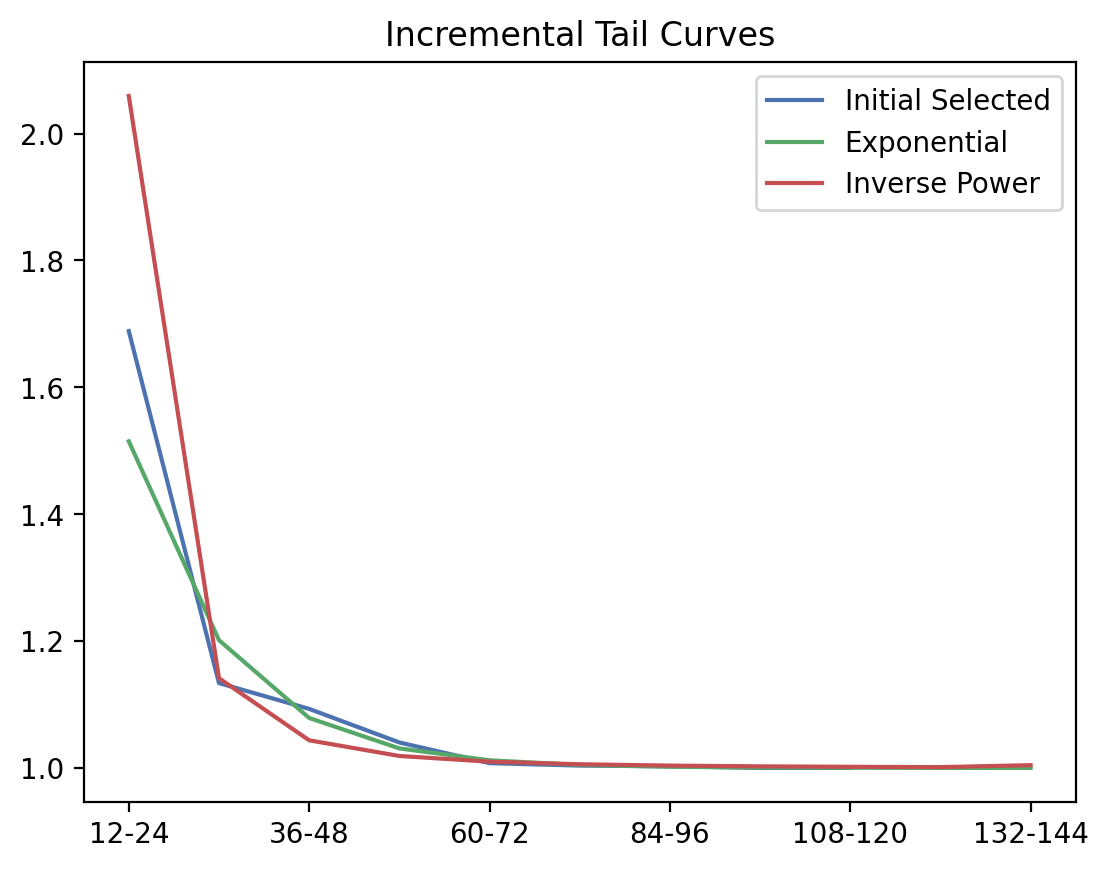

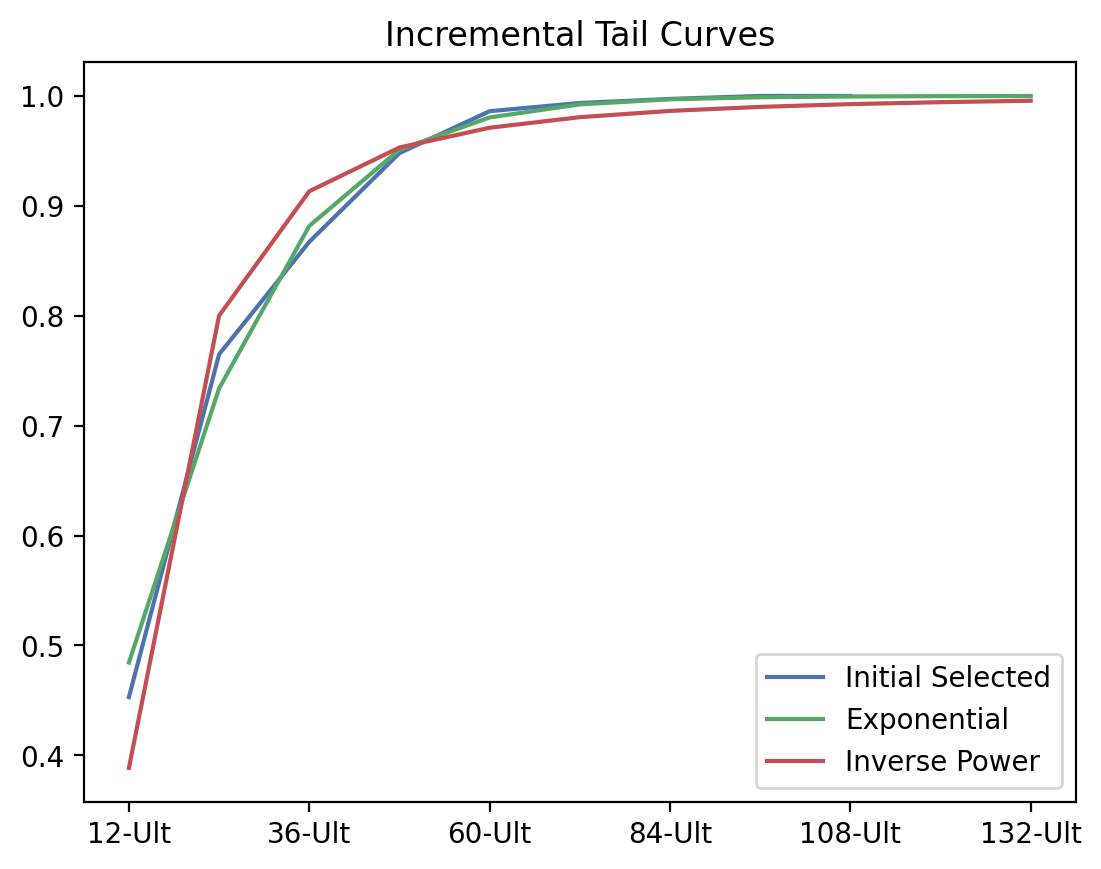

In [25]:
"""Tail Curves Plot"""

"""Incremental Tail Curves"""""
plotTailCurvess=pd.concat([ldfInitialSelected.to_frame(origin_as_datetima=False).rename({'(All)':'Initial Selected'}),(exponentialtailcurve.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Exponential'}),(inversepowertailcurve.ldf_).to_frame(origin_as_datetime=False).rename({'(All)':'Inverse Power'})]).T.plot(marker="",title="Incremental Tail Curves")

"""Cumulative Tail Curves"""""
plotTailCurvess=pd.concat([(1/cdfInitialSelected).to_frame(origin_as_datetime=False).rename({'(All)':'Initial Selected'}),(1/exponentialtailcurve.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Exponential'}),(1/inversepowertailcurve.cdf_).to_frame(origin_as_datetime=False).rename({'(All)':'Inverse Power'})]).T.plot(marker="",title="Incremental Tail Curves")

In [27]:
"""Tail Factor - Generic""" #Still need to figure out how to select between different calculated curves and tails


exponentialtail = cl.TailCurve(curve='exponential',extrap_periods=InputFuturePeriods).fit(triangle).tail_
exponentialtail

inversepowertail = cl.TailCurve(curve='inverse_power',extrap_periods=InputFuturePeriods).fit(triangle).tail_
inversepowertail

#Should find the way to pick the selected tail in here
SelectedTail=exponentialtail
SelectedTail

,120-Ult
(All),1.000181


In [28]:
"""DFM Ultimate, Cumulative Factors and Incremental Factors"""

"""Generic"""""
FinalModel= cl.Pipeline([("dev", InitialSelected_LDF), ("tail", SelectedTailCurve)]).fit_transform(triangle)
DFMUltimate=cl.Chainladder().fit(FinalModel).ultimate_
DFMUltimate

"""paid"""
FinalModel_Paid= cl.Pipeline([("dev", Average1_paid), ("tail", SelectedTailCurve) ]).fit_transform(triangle_paid)
DFMUltimate_Paid=cl.Chainladder().fit(FinalModel_Paid).ultimate_

"""incurred"""
FinalModel_Incurred= cl.Pipeline([("dev", Average1_incurred), ("tail", SelectedTailCurve) ]).fit_transform(triangle_incurred)
DFMUltimate_Incurred=cl.Chainladder().fit(FinalModel_Incurred).ultimate_

"""reported"""
FinalModel_reported= cl.Pipeline([("dev", Average1_reported), ("tail", SelectedTailCurve) ]).fit_transform(triangle_reported)
DFMUltimate_reported=cl.Chainladder().fit(FinalModel_reported).ultimate_

"""closed"""
FinalModel_closed= cl.Pipeline([("dev", Average1_closed), ("tail", SelectedTailCurve) ]).fit_transform(triangle_closed)
DFMUltimate_closed=cl.Chainladder().fit(FinalModel_closed).ultimate_

"""severity reported"""
FinalModel_severityreported= cl.Pipeline([("dev", Average1_severityreported), ("tail", SelectedTailCurve) ]).fit_transform(triangle_severity_reported)
DFMUltimate_severityreported=cl.Chainladder().fit(FinalModel_severityreported).ultimate_

"""severity paid"""
FinalModel_severitypaid= cl.Pipeline([("dev", Average1_severitypaid), ("tail", SelectedTailCurve) ]).fit_transform(triangle_severity_paid)
DFMUltimate_severitypaid=cl.Chainladder().fit(FinalModel_severitypaid).ultimate_

DFMUltimate_Incurred


,2261
2014,"1,891,886"
2015,"1,092,988"
2016,"1,684,588"
2017,"2,282,174"
2018,"1,358,404"
2019,"2,902,668"
2020,"2,701,986"
2021,"2,482,521"
2022,"1,151,501"
2023,"585,197"


In [ ]:
"""UltimatePatterns"""

Paid_CumPattern= DFMUltimate_Paid/triangle_paid.latest_diagonal
Incurred_CumPattern= DFMUltimate_Incurred/triangle_incurred.latest_diagonal
Reported_CumPattern= DFMUltimate_reported/triangle_reported.latest_diagonal
Closed_CumPattern= DFMUltimate_closed/triangle_closed.latest_diagonal


Incurred_CumPattern

,2261
2014,1.0002
2015,1.0002
2016,1.0002
2017,1.0029
2018,1.0066
2019,1.0142
2020,1.0550
2021,1.1533
2022,1.3076
2023,2.2080


In [ ]:
"""Case Reserve Method"""

CaseReservePattern= (1-1/Paid_CumPattern)/(1/Incurred_CumPattern-1/Paid_CumPattern)
CaseReserveUltimate= triangle_paid.latest_diagonal + CaseReservePattern*caseReserve.latest_diagonal
CaseReserveUltimate

,2023
2014,"1,324,080"
2015,"764,953"
2016,"1,178,998"
2017,"-8,860,829,791,173,200,896"
2018,"944,615"
2019,"2,003,330"
2020,"1,792,740"
2021,"772,982,294,344,055,521,280"
2022,"559,749,336,167,216,971,776"
2023,"744,205,396,113,921,409,024"


In [ ]:
"""selecting ultimate severity"""

CaseReserveUltimate_Severity= CaseReserveUltimate/DFMUltimate_reported

DFMseverity_reported_df= DFMUltimate_severityreported.to_frame()
DFMseverity_paid_df= DFMUltimate_severitypaid.to_frame()
CaseReserveUltimate_Severity_df= CaseReserveUltimate_Severity.to_frame()


#Input for Final Selection. This shoulds be spaces to mannually select.
SevInput12=1100
SevInput24=1100
SevInput36=1100
SevInput48=1100
SevInput60=1100
SevInput72=1100
SevInput84=1100
SevInput96=1100
SevInput108=1100
SevInput120=1100

SelectedUltimateSeverity=[SevInput120, SevInput108, SevInput96, SevInput84, SevInput72, SevInput60, SevInput48, SevInput36, SevInput24, SevInput12]

SelectionSeverity_df = pd.concat([DFMseverity_reported_df, DFMseverity_paid_df, CaseReserveUltimate_Severity_df], axis=1 )
SelectionSeverity_df.columns = ['Reported Severity Development Method', 'Paid Severity Development Method','Case Reserve Method']
SelectionSeverity_df['Selected Ultimate Severity'] = SelectedUltimateSeverity
SelectionSeverity_df


,Reported Severity Development Method,Paid Severity Development Method,Case Reserve Method,Selected Ultimate Severity
2014-01-01,1433.271082,6.599895e+98,9.998975e+02,1100
2015-01-01,1434.972213,1.142150e+99,1.001084e+03,1100
2016-01-01,1433.182053,1.775360e+99,9.998354e+02,1100
2017-01-01,1434.348835,9.107545e+99,-5.551314e+15,1100
2018-01-01,1434.438400,2.611862e+99,9.943353e+02,1100
2019-01-01,1433.661516,7.885299e+99,9.863057e+02,1100
2020-01-01,1433.769222,9.107914e+99,9.482564e+02,1100
2021-01-01,1433.646170,2.513929e+100,4.449404e+17,1100
2022-01-01,1434.678838,2.756805e+100,6.951750e+17,1100
2023-01-01,1407.817881,3.874417e+99,1.784412e+18,1100


In [ ]:
"""bringing thew exposure. One for each segment and gross/net. We can have also Exposure, Written premium, salary, as exposure measure"""

"""Earned Premium"""
Type='Earned Premium'
Segment='Motor'
GrossNet='Gross'

EarnedPremium= we.loc[Type, Segment, GrossNet]
EarnedPremium

"""Exposure"""
Type='Exposure'
Segment='Motor'
GrossNet='Gross'

exposure= we.loc[Type, Segment, GrossNet]
exposure

,12,24,36,48,60,72,84,96,108,120
2014,"33,901","52,207","56,063","56,706","56,706","56,706","56,746","56,746","56,746","56,746"
2015,"21,179","27,860","32,441","33,379","32,792","32,784","32,784","32,784","32,784",
2016,"18,975","42,495","45,973","44,954","49,006","49,417","50,150","50,528",,
2017,"25,623","44,348","54,768","62,760","66,455","68,268","68,268",,,
2018,"8,950","18,655","25,840","35,691","40,840","40,484",,,,
2019,"49,314","76,096","79,792","85,347","85,857",,,,,
2020,"33,479","56,086","67,090","76,832",,,,,,
2021,"34,026","58,459","64,579",,,,,,,
2022,"12,982","26,419",,,,,,,,
2023,"7,951",,,,,,,,,


In [ ]:
"""calculating frequency"""

"""generic frequency triangle. Would be good to have it with each DFM as a visual"""
TriangleFrequency= triangle/exposure
TriangleFrequency

"""Ultimate Loss Ratios for Expected Methods and BFs"""
DFMfrequency_reported= DFMUltimate_reported/exposure.latest_diagonal
DFMfrequency_closed=DFMUltimate_closed/exposure.latest_diagonal

DFMfrequency_reported_df= DFMfrequency_reported.to_frame()
DFMfrequency_closed_df= DFMfrequency_closed.to_frame()

#Input for Final Selection. This shoulds be spaces to mannually select.
FreqInput12=0.025
FreqInput24=0.025
FreqInput36=0.025
FreqInput48=0.025
FreqInput60=0.025
FreqInput72=0.025
FreqInput84=0.025
FreqInput96=0.025
FreqInput108=0.025
FreqInput120=0.025

SelectedFrequency=[FreqInput120, FreqInput108, FreqInput96, FreqInput84, FreqInput72, FreqInput60, FreqInput48, FreqInput36, FreqInput24, FreqInput12]

SelectionFrequency_df = pd.concat([DFMfrequency_reported_df, DFMfrequency_closed_df], axis=1 )
SelectionFrequency_df.columns = ['Reported Development Method', 'Closed Development Method']
SelectionFrequency_df['Selected Initial Expected'] = SelectedFrequency
SelectionFrequency_df


,Reported Development Method,Closed Development Method,Selected Initial Expected
2014-01-01,0.023336,0.004812,0.025
2015-01-01,0.023308,0.002780,0.025
2016-01-01,0.023337,0.002064,0.025
2017-01-01,0.023381,0.000439,0.025
2018-01-01,0.023466,0.002921,0.025
2019-01-01,0.023657,0.000971,0.025
2020-01-01,0.024607,0.000935,0.025
2021-01-01,0.026902,0.000392,0.025
2022-01-01,0.030478,0.000561,0.025
2023-01-01,0.052454,0.008639,0.025


In [ ]:
"""Expected Methods and BFs claim counts"""
IEFreq_Triangle=SelectedFrequency*exposure
IEFreq=IEFreq_Triangle.latest_diagonal

"""Expected Methods"""
InitialExpectedFreqMethod=IEFreq

"""BF - Generic"""
BF_Ultimate_Claims= cl.BornhuetterFerguson(apriori=1).fit(triangle,sample_weight=IEFreq).ultimate_
BF_Ultimate_Claims

"""BF - Reported and Closed"""
BF_Reported_Ultimate= cl.BornhuetterFerguson(apriori=1).fit(triangle_reported,sample_weight=IEFreq).ultimate_
BF_Reported_Ultimate

BF_Closed_Ultimate= cl.BornhuetterFerguson(apriori=1).fit(triangle_closed,sample_weight=IEFreq).ultimate_
BF_Closed_Ultimate


,2261
2014,248
2015,"-1,152"
2016,"-2,433"
2017,"-4,754"
2018,"-3,845"
2019,"-8,553"
2020,"-9,395"
2021,"-8,886"
2022,"-3,795"
2023,-672


In [ ]:
"""Selection of Ultimate Claims Counts"""
DFMUltimate_reported_df=DFMUltimate_reported.to_frame()
DFMUtimate_closed_df=DFMUltimate_closed.to_frame()
BF_Reported_df=BF_Reported_Ultimate.to_frame()
BF_Closed_df=BF_Closed_Ultimate.to_frame()
IEFreq_df=IEFreq.to_frame()

#Mannual input for Final Selection. This shoulds be spaces to mannually select.
UltFreqInput12=450
UltFreqInput24=900
UltFreqInput36=1738
UltFreqInput48=1920
UltFreqInput60=2147
UltFreqInput72=1012
UltFreqInput84=1706
UltFreqInput96=1263
UltFreqInput108=820
UltFreqInput120=1418

SelectedUltimateCounts=[UltFreqInput120, UltFreqInput108, UltFreqInput96, UltFreqInput84, UltFreqInput72, UltFreqInput60, UltFreqInput48, UltFreqInput36, UltFreqInput24, UltFreqInput12]

SelectionClaimCount_df = pd.concat([DFMUltimate_reported_df, DFMUtimate_closed_df , BF_Reported_df, BF_Closed_df, IEFreq_df], axis=1 )
SelectionClaimCount_df.columns = ['Reported Development Method', 'Closed Development Method', 'Reported BF Method', 'Closed BF Method', 'Initial Expected Method']
SelectionClaimCount_df['Selected Ultimate Counts'] = SelectedUltimateCounts
SelectionClaimCount_df

,Reported Development Method,Closed Development Method,Reported BF Method,Closed BF Method,Initial Expected Method,Selected Ultimate Counts
2014-01-01,1324.215702,273.036445,1324.000000,247.500000,1418.657143,1418
2015-01-01,764.124469,91.149629,764.000000,-1151.610470,819.592500,820
2016-01-01,1179.192079,104.302334,1179.000000,-2432.623104,1263.212143,1263
2017-01-01,1596.167948,29.970639,1596.179242,-4753.615006,1706.697857,1706
2018-01-01,949.996480,118.269710,950.224559,-3845.357085,1012.087500,1012
2019-01-01,2031.145073,83.376347,2032.340707,-8553.273225,2146.425000,2147
2020-01-01,1890.564685,71.819568,1891.827863,-9395.356230,1920.792857,1920
2021-01-01,1737.271462,25.332305,1720.765579,-8885.564401,1614.465000,1738
2022-01-01,805.191932,14.820392,771.107119,-3794.664737,660.478929,900
2023-01-01,417.059202,68.688967,297.679480,-672.150892,198.772500,450


In [ ]:
"""Calculatin Frequency/SeverityUltimate"""
FreqSevUltimate=SelectionClaimCount_df['Selected Ultimate Counts'] *SelectionSeverity_df['Selected Ultimate Severity']
FreqSevUltimate

2014-01-01    1559800
2015-01-01     902000
2016-01-01    1389300
2017-01-01    1876600
2018-01-01    1113200
2019-01-01    2361700
2020-01-01    2112000
2021-01-01    1911800
2022-01-01     990000
2023-01-01     495000
Freq: YS-JAN, dtype: int64

In [ ]:
"""calculating Loss Ratios"""

"""generic loss ratio triangle. Would be good to have it with each DFM as a visual"""
TriangleLossRatio= triangle/EarnedPremium
TriangleLossRatio

"""Ultimate Loss Ratios for Expected Methods and BFs"""
DFMLossRatio_Paid= DFMUltimate_Paid/EarnedPremium.latest_diagonal
DFMLossRatio_Incurred=DFMUltimate_Incurred/EarnedPremium.latest_diagonal
CaseReserveLossRatio=CaseReserveUltimate/EarnedPremium.latest_diagonal
FreqSevLossRatio=FreqSevUltimate.to_frame()/EarnedPremium.latest_diagonal.to_frame().values


DFMLossRatio_Paid_df= DFMLossRatio_Paid.to_frame()
DFMLossRatio_Incurred_df= DFMLossRatio_Incurred.to_frame()
CaseReserveLossRatio_df= CaseReserveLossRatio.to_frame()
FreqSevLossRatio_df=FreqSevLossRatio


#Input for Final Selection. This shoulds be spaces to mannually select.
LRInput12=0.7
LRInput24=0.7
LRInput36=0.7
LRInput48=0.7
LRInput60=0.7
LRInput72=0.7
LRInput84=0.7
LRInput96=0.7
LRInput108=0.7
LRInput120=0.7

SelectedLossRatio=[LRInput120, LRInput108, LRInput96, LRInput84, LRInput72, LRInput60, LRInput48, LRInput36, LRInput24, LRInput12]

SelectionLossRatio_df = pd.concat([DFMLossRatio_Incurred_df, DFMLossRatio_Paid_df,CaseReserveLossRatio_df, FreqSevLossRatio], axis=1)
SelectionLossRatio_df.columns = ['Incurred Development Method', 'Paid Development Method', 'Case Reserve Method','Frequency Severity Method']
SelectionLossRatio_df['Selected Initial Expected'] = SelectedLossRatio
SelectionLossRatio_df




,Incurred Development Method,Paid Development Method,Case Reserve Method,Frequency Severity Method,Selected Initial Expected
2014-01-01,1.000181,0.700127,7.000000e-01,0.824618,0.7
2015-01-01,1.000181,0.700127,7.000000e-01,0.825410,0.7
2016-01-01,1.000181,0.700127,7.000000e-01,0.824861,0.7
2017-01-01,1.002890,0.702023,-3.893848e+12,0.824663,0.7
2018-01-01,1.006635,0.704645,7.000000e-01,0.824929,0.7
2019-01-01,1.014245,0.709972,7.000000e-01,0.825221,0.7
2020-01-01,1.055028,0.738519,7.000000e-01,0.824659,0.7
2021-01-01,1.153256,0.807279,3.590891e+14,0.888127,0.7
2022-01-01,1.307575,0.915303,6.356176e+14,1.124184,0.7
2023-01-01,2.208040,1.578953,2.808004e+15,1.867713,0.7


In [ ]:
"""calculating Burning Cost"""

"""generic burnin cost triangle. Would be good to have it with each DFM as a visual"""
TriangleBC= triangle/exposure
TriangleBC

"""Ultimate bc for Expected Methods and BFs"""
DFMBC_Paid= DFMUltimate_Paid/exposure.latest_diagonal
DFMBC_Incurred=DFMUltimate_Incurred/exposure.latest_diagonal
CaseReserveBC=CaseReserveUltimate/exposure.latest_diagonal
FreqSevBC=FreqSevUltimate.to_frame()/exposure.latest_diagonal.to_frame().values

DFMBC_Paid_df= DFMBC_Paid.to_frame()
DFMBC_Incurred_df= DFMBC_Incurred.to_frame()
CaseReserveBC_df= CaseReserveBC.to_frame()
FreqSevBC_df=FreqSevBC

#Input for Final Selection. This shoulds be spaces to mannually select.
BCInput12=25
BCInput24=25
BCInput36=25
BCInput48=25
BCInput60=25
BCInput72=25
BCInput84=25
BCInput96=25
BCInput108=25
BCInput120=25

SelectedBC=[BCInput120, BCInput108, BCInput96, BCInput84, BCInput72, BCInput60, BCInput48, BCInput36, BCInput24, BCInput12]

SelectionBurningCost_df = pd.concat([DFMBC_Incurred_df, DFMBC_Paid_df, CaseReserveBC_df, FreqSevBC_df], axis=1 )
SelectionBurningCost_df.columns = ['Incurred Development Method', 'Paid Development Method','Case Reserve Method','Frequency Severity Method']
SelectionBurningCost_df['Selected Initial Expected'] = SelectedBC
SelectionBurningCost_df

,Incurred Development Method,Paid Development Method,Case Reserve Method,Frequency Severity Method,Selected Initial Expected
2014-01-01,33.339374,23.337562,2.333333e+01,27.487262,25
2015-01-01,33.339374,23.337562,2.333333e+01,27.513673,25
2016-01-01,33.339374,23.337562,2.333333e+01,27.495382,25
2017-01-01,33.429679,23.400775,-1.297949e+14,27.488755,25
2018-01-01,33.554516,23.488161,2.333333e+01,27.497622,25
2019-01-01,33.808170,23.665719,2.333333e+01,27.507367,25
2020-01-01,35.167588,24.617311,2.333333e+01,27.488649,25
2021-01-01,38.441858,26.909301,1.196964e+16,29.604234,25
2022-01-01,43.585847,30.510093,2.118725e+16,37.472808,25
2023-01-01,73.601324,52.631764,9.360015e+16,62.257103,25


In [ ]:

IELR_Triangle=SelectedLossRatio*EarnedPremium
IELR=IELR_Triangle.latest_diagonal

"""Expected Methods"""
InitialExpectedMethod=IELR

"""BF - Generic"""
BF_Ultimate= cl.BornhuetterFerguson(apriori=1).fit(triangle,sample_weight=IELR).ultimate_
BF_Ultimate

"""BF - Paid and Incurred"""
BF_Incurred_Ultimate= cl.BornhuetterFerguson(apriori=1).fit(triangle_incurred,sample_weight=IELR).ultimate_
BF_Incurred_Ultimate

BF_Paid_Ultimate= cl.BornhuetterFerguson(apriori=1).fit(triangle_paid,sample_weight=IELR).ultimate_
BF_Paid_Ultimate



,2261
2014,"1,324,080"
2015,"764,953"
2016,"1,178,998"
2017,"1,597,221"
2018,"950,672"
2019,"2,031,109"
2020,"1,885,937"
2021,"1,706,840"
2022,"761,366"
2023,"291,006"


In [ ]:
"""CC with EP - Generic"""
CC_EP_Ultimate= cl.CapeCod().fit(triangle,sample_weight=EarnedPremium.latest_diagonal).ultimate_
CC_EP_Ultimate

CC_EP_Incurred_Ultimate=cl.CapeCod().fit(triangle_incurred,sample_weight=EarnedPremium.latest_diagonal).ultimate_
CC_EP_Paid_Ultimate=cl.CapeCod().fit(triangle_paid,sample_weight=EarnedPremium.latest_diagonal).ultimate_

"""CC with Claim Counts - Generic"""
#CC_Ultimate= cl.CapeCod().fit(triangle,sample_weight=SelectedUltimateCounts).ultimate_
#CC_Ultimate

AttributeError: 'list' object has no attribute 'set_backend'

In [ ]:
"""Ultimate Selection"""
DFMUltimate_Incurred_df=DFMUltimate_Incurred.to_frame()
DFMUltimate_Paid_df=DFMUltimate_Paid.to_frame()
CaseReserveUltimate_df=CaseReserveUltimate.to_frame()
FreqSevUltimate_df=FreqSevUltimate.to_frame()
InitialExpectedMethod_df= InitialExpectedMethod.to_frame()
BF_Incurred_Ultimate_df=BF_Incurred_Ultimate.to_frame()
BF_Paid_Ultimate_df=BF_Paid_Ultimate.to_frame()
CC_EP_Incurred_Ultimate_df= CC_EP_Incurred_Ultimate.to_frame()
CC_EP_Paid_Ultimate_df= CC_EP_Paid_Ultimate.to_frame()

#Input for Final Selection. This shoulds be spaces to mannually select.
UltInput12=190000
UltInput24=650000
UltInput36=1550000
UltInput48=1800000
UltInput60=2000000
UltInput72=95000
UltInput84=1600000
UltInput96=1200000
UltInput108=770000
UltInput120=1325000

SelectedUltimate=[UltInput120, UltInput108, UltInput96, UltInput84, UltInput72, UltInput60, UltInput48, UltInput36, UltInput24, UltInput12]

SelectionUltimate_df = pd.concat([DFMUltimate_Incurred_df, DFMUltimate_Paid_df,FreqSevUltimate_df, CaseReserveUltimate_df, InitialExpectedMethod_df, BF_Incurred_Ultimate_df, BF_Paid_Ultimate_df, CC_EP_Incurred_Ultimate_df, CC_EP_Paid_Ultimate_df], axis=1 )
SelectionUltimate_df.columns = ['Incurred Development Method', 'Paid Development Method','Case Reserve Method', 'Frequency Severity Method', 'Intial Expected Methhod', 'BF Incurred Method', 'BF Paid Method','Cape Code Incurred Method', 'Cape Code Paid Method']
SelectionUltimate_df['Selected Ultimate Amounts'] = SelectedUltimate
SelectionUltimate_df

,Incurred Development Method,Paid Development Method,Case Reserve Method,Frequency Severity Method,Intial Expected Methhod,BF Incurred Method,BF Paid Method,Cape Code Incurred Method,Cape Code Paid Method,Selected Ultimate Amounts
2014-01-01,1.891886e+06,1.324320e+06,1559800,1.324080e+06,1324080.0,1.891543e+06,1.324080e+06,1.891543e+06,1.324080e+06,1325000
2015-01-01,1.092988e+06,7.650916e+05,902000,7.649530e+05,764953.0,1.092790e+06,7.649530e+05,1.092790e+06,7.649530e+05,770000
2016-01-01,1.684588e+06,1.179212e+06,1389300,1.178998e+06,1178998.0,1.684283e+06,1.178998e+06,1.684283e+06,1.178998e+06,1200000
2017-01-01,2.282174e+06,1.597522e+06,1876600,-8.860830e+18,1592918.0,2.279900e+06,1.597221e+06,2.282058e+06,1.597442e+06,1600000
2018-01-01,1.358404e+06,9.508830e+05,1113200,9.446150e+05,944615.0,1.355507e+06,9.506716e+05,1.358543e+06,9.509825e+05,95000
2019-01-01,2.902668e+06,2.031868e+06,2361700,2.003330e+06,2003330.0,2.889679e+06,2.031109e+06,2.903607e+06,2.032535e+06,2000000
2020-01-01,2.701986e+06,1.891390e+06,2112000,1.792740e+06,1792740.0,2.654254e+06,1.885937e+06,2.700983e+06,1.890721e+06,1800000
2021-01-01,2.482521e+06,1.737765e+06,1911800,7.729823e+20,1506834.0,2.352626e+06,1.706840e+06,2.452909e+06,1.717107e+06,1550000
2022-01-01,1.151501e+06,8.060509e+05,990000,5.597493e+20,616447.0,1.025557e+06,7.613658e+05,1.098220e+06,7.688049e+05,650000
2023-01-01,5.851968e+05,4.184699e+05,495000,7.442054e+20,185521.0,3.665151e+05,2.910061e+05,4.173998e+05,2.962157e+05,190000


In [ ]:
"""Diagnostics triangles"""
"""Loss"""
PaidtoIncurred= triangle_paid/triangle_incurred
CasetoPaid=caseReserve/triangle_paid
CaseReservestoOpen=caseReserve/triangle_open
IncurredtoReported= triangle_incurred/triangle_reported
PaidtoClosed= triangle_paid/triangle_closed
IncurredtoEarnedPremium=triangle_incurred/EarnedPremium
PaidtoEarnedPrmeium=triangle_paid/EarnedPremium
IncurredtoExposure=triangle_incurred/exposure
PaidtoExposure=triangle_paid/exposure

"""Claim Counts"""
ClosedPerExposure=triangle_closed/exposure
ReportedPerExposure=triangle_reported/exposure
ClosedstoReported=triangle_closed/triangle_reported